In [43]:
import random
from typing import TypedDict
from langgraph.graph import StateGraph, END
import networkx as nx
import matplotlib.pyplot as plt


In [44]:
# Define state schema
class MyState(TypedDict):
    number: int
    result: int
# Define the nodes
def generate_random_number(state):
    return {"number": random.randint(1, 10)}

def square_number(state):
    number = state.get("number")
    if number is not None:
        return {"result": number ** 2}
    return {}

In [45]:
# Create the graph
graph = StateGraph(state_schema = MyState)

In [46]:
# Add nodes
graph.add_node("generate_number", generate_random_number)
graph.add_node("square_number", square_number)


In [47]:

# Define edges
graph.add_edge("generate_number", "square_number")

# Set the entry point
graph.set_entry_point("generate_number")
graph.add_edge("square_number", END)

In [48]:
# Compile the graph
graph = graph.compile()

In [49]:
output = graph.invoke({})
print(output)

{'number': 10, 'result': 100}


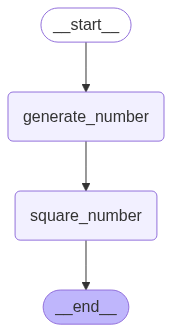

In [50]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

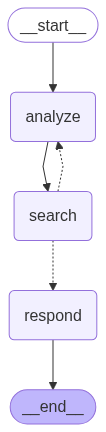

In [55]:
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

# 1. Define your state class
class State:
    def __init__(self, step=None, data=None, results=None):
        self.step = step
        self.data = data
        self.results = results

# 2. Define node functions
def analyze(state):
    print("Analyzing...")
    return State(step="search", data=state.data)

def search(state):
    print("Searching...")
    if state.data == "retry":
        return State(step="analyze", results=None)
    else:
        return State(step="respond", results="found")

def respond(state):
    print("Responding...")
    return State(step=END)

# 3. Build the graph
builder = StateGraph(State)
builder.add_node("analyze", analyze)
builder.add_node("search", search)
builder.add_node("respond", respond)

# 4. Define edge from analyze → search
builder.add_edge("analyze", "search")

# 5. Add conditional edge from search
def should_continue(state):
    return "respond" if state.results else "analyze"

builder.add_conditional_edges("search", should_continue, {
    "respond": "respond",
    "analyze": "analyze"
})

# 6. Entry and compile
builder.set_entry_point("analyze")
graph = builder.compile()

# 7. Visualize
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Graph rendering failed:", e)